In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import os


import plotly.graph_objects as go

In [2]:
data_dir = os.path.join('D:', os.path.sep, 'Prg', 'Trading Bots', 'Market Dataset', 'dukascopy')
EUR_USD_1H = os.path.join(data_dir, 'EURUSD_Candlestick_1_Hour_BID_01.05.2023-18.05.2024.csv')
EUR_USD_1D = os.path.join(data_dir, 'EURUSD_Candlestick_1_D_BID_01.05.2023-18.05.2024.csv')
EUR_USD_Ticks = os.path.join(data_dir, 'EURUSD_Ticks_01.05.2023-01.05.2023.csv')

data_dir

'D:\\Prg\\Trading Bots\\Market Dataset\\dukascopy'

In [3]:
df_1H = pd.read_csv(EUR_USD_1H)
df_1D = pd.read_csv(EUR_USD_1D)
df_Tick = pd.read_csv(EUR_USD_Ticks)


In [4]:
print(df_1H.shape)
print(df_1D.shape)
print(df_Tick.shape)


(6558, 6)
(328, 6)
(78987, 5)


In [9]:
df_1D.tail()

,Gmt time,Open,High,Low,Close,Volume
323,13.05.2024 00:00:00.000,1.07701,1.08068,1.07658,1.07920,1.126971e+11
324,14.05.2024 00:00:00.000,1.07922,1.08256,1.07669,1.08138,1.245930e+11
325,15.05.2024 00:00:00.000,1.08137,1.08901,1.08130,1.08883,1.596344e+11
326,16.05.2024 00:00:00.000,1.08883,1.08949,1.08544,1.08677,1.393613e+11
327,17.05.2024 00:00:00.000,1.08679,1.08784,1.08356,1.08674,1.091938e+11


In [6]:
df_1H.tail()

,Gmt time,Open,High,Low,Close,Volume
6553,17.05.2024 16:00:00.000,1.08686,1.08743,1.08671,1.08686,4.743630e+09
6554,17.05.2024 17:00:00.000,1.08685,1.08743,1.08682,1.08736,5.049990e+09
6555,17.05.2024 18:00:00.000,1.08735,1.08768,1.08719,1.08756,4.968180e+09
6556,17.05.2024 19:00:00.000,1.08755,1.08762,1.08705,1.08724,2.584990e+09
6557,17.05.2024 20:00:00.000,1.08726,1.08727,1.08674,1.08674,3.855710e+09


In [10]:
df_1H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gmt time  6558 non-null   object 
 1   Open      6558 non-null   float64
 2   High      6558 non-null   float64
 3   Low       6558 non-null   float64
 4   Close     6558 non-null   float64
 5   Volume    6558 non-null   float64
dtypes: float64(5), object(1)
memory usage: 307.5+ KB


## Filter holidays for 1H dataset

**Volume is an indicator of liquity, also shows in which candle there was no trade**
<br/>
**In 1D timeframe, volume = 0 means day off or weekend.**

In [11]:
# df[['Date', 'Time']] = df['Gmt time'].str.split(' ', expand=True)
df_1H['Date'] = df_1H['Gmt time'].str.split(' ', expand=True)[0]


In [12]:
df_1H.head(2)

,Gmt time,Open,High,Low,Close,Volume,Date
0,01.05.2023 00:00:00.000,1.10106,1.10143,1.10045,1.10055,8.127140e+09,01.05.2023
1,01.05.2023 01:00:00.000,1.10055,1.10084,1.10020,1.10040,7.000590e+09,01.05.2023


In [13]:
holidays =  (df_1H[df_1H['Volume'] == 0].groupby('Date').count()['Close'] >= 24).index
df_ops =  df_1H[~ df_1H['Date'].isin(holidays)].copy()
print(df_ops.shape)
df_ops[df_ops['Volume'] == 0]

(6558, 7)


,Gmt time,Open,High,Low,Close,Volume,Date


In [14]:
df_ops.tail()

,Gmt time,Open,High,Low,Close,Volume,Date
6553,17.05.2024 16:00:00.000,1.08686,1.08743,1.08671,1.08686,4.743630e+09,17.05.2024
6554,17.05.2024 17:00:00.000,1.08685,1.08743,1.08682,1.08736,5.049990e+09,17.05.2024
6555,17.05.2024 18:00:00.000,1.08735,1.08768,1.08719,1.08756,4.968180e+09,17.05.2024
6556,17.05.2024 19:00:00.000,1.08755,1.08762,1.08705,1.08724,2.584990e+09,17.05.2024
6557,17.05.2024 20:00:00.000,1.08726,1.08727,1.08674,1.08674,3.855710e+09,17.05.2024


In [15]:
df_1D.tail()

,Gmt time,Open,High,Low,Close,Volume
323,13.05.2024 00:00:00.000,1.07701,1.08068,1.07658,1.07920,1.126971e+11
324,14.05.2024 00:00:00.000,1.07922,1.08256,1.07669,1.08138,1.245930e+11
325,15.05.2024 00:00:00.000,1.08137,1.08901,1.08130,1.08883,1.596344e+11
326,16.05.2024 00:00:00.000,1.08883,1.08949,1.08544,1.08677,1.393613e+11
327,17.05.2024 00:00:00.000,1.08679,1.08784,1.08356,1.08674,1.091938e+11


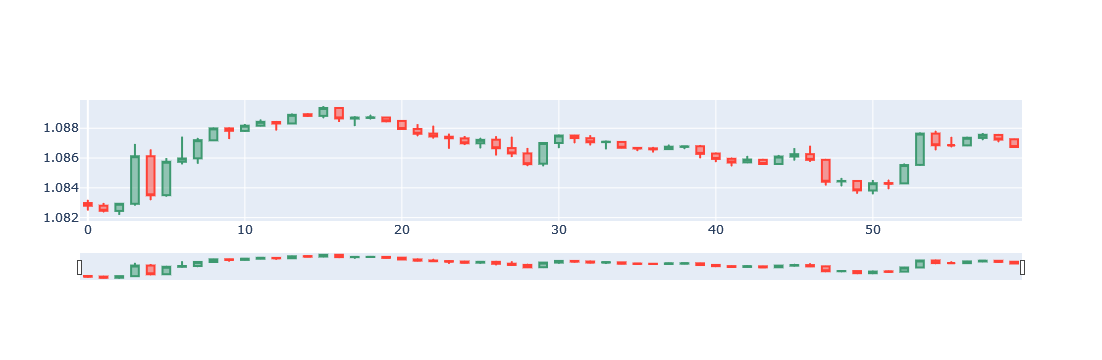

In [25]:
dfpl = df_ops[-60:].reset_index(drop=True)

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                                     open=dfpl['Open'],
                                     high=dfpl['High'],
                                     low=dfpl['Low'],
                                     close=dfpl['Close']
                                    )])

fig.show()


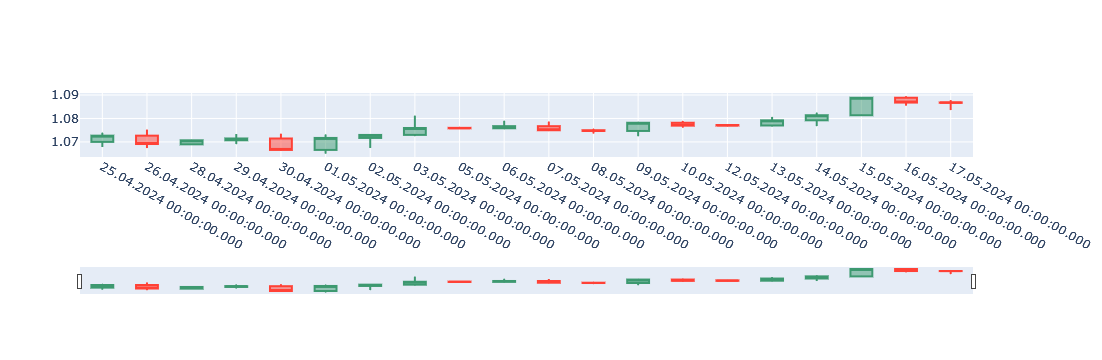

In [26]:
dfpl = df_1D[-20:].reset_index(drop=True)

fig = go.Figure(data=[go.Candlestick(x=dfpl['Gmt time'],
                                     open=dfpl['Open'],
                                     high=dfpl['High'],
                                     low=dfpl['Low'],
                                     close=dfpl['Close']
                                    )])

fig.show()

## ADD Indicators

In [ ]:
df_ops['EMA'] = ta.ema(df_ops.Close, length=10)
df_ops['RSI_10'] = ta.rsi(df_ops.Close, length=10)

In [31]:
df_ops.tail()

,Gmt time,Open,High,Low,Close,Volume,Date,EMA,RSI_10
6553,17.05.2024 16:00:00.000,1.08686,1.08743,1.08671,1.08686,4.743630e+09,17.05.2024,1.085962,58.811028
6554,17.05.2024 17:00:00.000,1.08685,1.08743,1.08682,1.08736,5.049990e+09,17.05.2024,1.086216,62.395262
6555,17.05.2024 18:00:00.000,1.08735,1.08768,1.08719,1.08756,4.968180e+09,17.05.2024,1.086461,63.795480
6556,17.05.2024 19:00:00.000,1.08755,1.08762,1.08705,1.08724,2.584990e+09,17.05.2024,1.086602,59.834675
6557,17.05.2024 20:00:00.000,1.08726,1.08727,1.08674,1.08674,3.855710e+09,17.05.2024,1.086627,54.012740


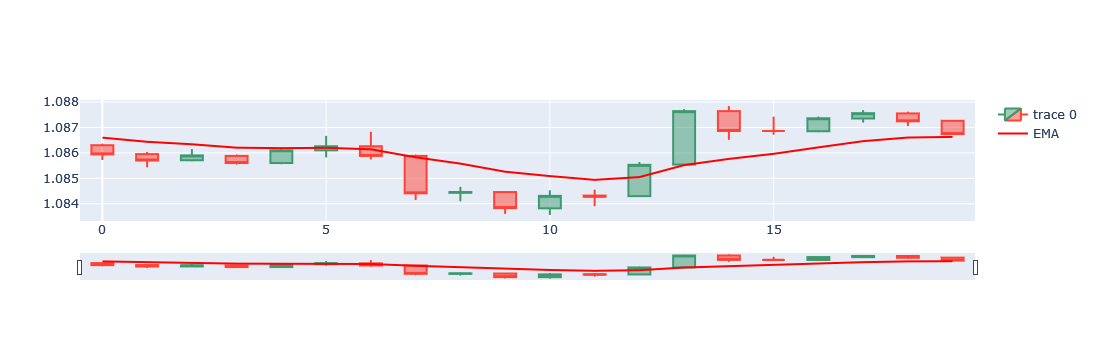

In [46]:
dfpl = df_ops[-20:].reset_index(drop=True)

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                                     open=dfpl['Open'],
                                     high=dfpl['High'],
                                     low=dfpl['Low'],
                                     close=dfpl['Close']),
                      go.Scatter(x=dfpl.index, y=dfpl.EMA, line=dict(color='red', width=2), name='EMA')
                     ])

fig.show()
 

### List of indicator tools

In [48]:
df_1H.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [ ]:
What aout candle patterns

In [47]:
help(ta.cci)

Help on function cci in module pandas_ta.momentum.cci:

cci(high, low, close, length=None, c=None, talib=None, offset=None, **kwargs)
    Commodity Channel Index (CCI)
    
    Commodity Channel Index is a momentum oscillator used to primarily identify
    overbought and oversold levels relative to a mean.
    
    Sources:
        https://www.tradingview.com/wiki/Commodity_Channel_Index_(CCI)
    
    Calculation:
        Default Inputs:
            length=14, c=0.015
        SMA = Simple Moving Average
        MAD = Mean Absolute Deviation
        tp = typical_price = hlc3 = (high + low + close) / 3
        mean_tp = SMA(tp, length)
        mad_tp = MAD(tp, length)
        CCI = (tp - mean_tp) / (c * mad_tp)
    
    Args:
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 14
        c (float): Scaling Constant. Default: 0.015
        talib (bool): If TA Lib is

In [49]:
help(ta.candles.cdl_pattern)

Help on function cdl_pattern in module pandas_ta.candles.cdl_pattern:

cdl_pattern(open_, high, low, close, name: Union[str, Sequence[str]] = 'all', scalar=None, offset=None, **kwargs) -> pandas.core.frame.DataFrame
    Candle Pattern
    
    A wrapper around all candle patterns.
    
    Examples:
    
    Get all candle patterns (This is the default behaviour)
    >>> df = df.ta.cdl_pattern(name="all")
    Or
    >>> df.ta.cdl("all", append=True) # = df.ta.cdl_pattern("all", append=True)
    
    Get only one pattern
    >>> df = df.ta.cdl_pattern(name="doji")
    Or
    >>> df.ta.cdl("doji", append=True)
    
    Get some patterns
    >>> df = df.ta.cdl_pattern(name=["doji", "inside"])
    Or
    >>> df.ta.cdl(["doji", "inside"], append=True)
    
    Args:
        open_ (pd.Series): Series of 'open's
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        close (pd.Series): Series of 'close's
        name: (Union[str, Sequence[str]]): name of 